# Benchmarking SBML model Simulators

We compare the performance of bioscrape with the state-of-the-art Systems Biology Markup Language (SBML) model simulator in Python: `libRoadRunner`, MATLAB Simbiology SBML simulation tools, and GUI-based simulation of SBML models using COPASI.

In [1]:
#Import all packages 
### NOTE: Make sure that you install libroadrunner by running `pip install libroadrunner` to run this notebook ####
import matplotlib.pyplot as plt
import time
from bioscrape.types import Model
from bioscrape.simulator import ModelCSimInterface, DeterministicSimulator, SSASimulator
import roadrunner
import numpy as np

C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
sim_performance = {}

# Deterministic Simulation

## Bioscrape deterministic simulator

C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:56: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


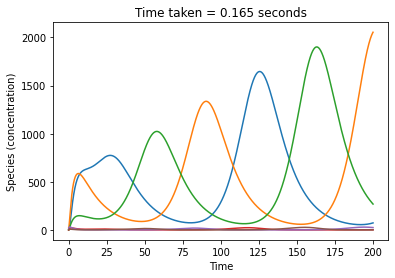

In [3]:
m = Model(sbml_filename="models/repressilator_sbml.xml")
timepoints=np.linspace(0, 200, 200000)
s = ModelCSimInterface(m)
s.py_set_initial_time(timepoints[0])
s.py_prep_deterministic_simulation()
det_simulator = DeterministicSimulator()
t0 = time.time()
det_result = det_simulator.py_simulate(s,timepoints)
tf = time.time()
results = det_result.py_get_dataframe(Model=m)
for species in results:
    if species != 'time':
        plt.plot(timepoints, results[species])
plt.title("Time taken = {:0.3f} seconds".format(tf-t0))
plt.ylabel("Species (concentration)")
plt.xlabel("Time")
plt.show()
sim_performance["bioscrape"] = {}
sim_performance["bioscrape"]["deterministic"] = tf-t0

## Libroadrunner deterministic simulator

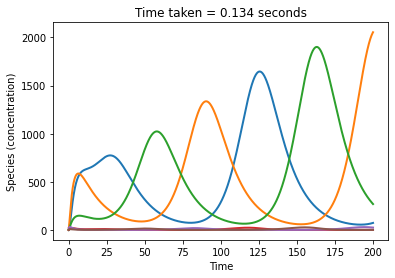

In [4]:
rr = roadrunner.RoadRunner("models/repressilator_sbml.xml")
t0 = time.time()
results = rr.simulate(0, 200, 200000)
tf = time.time()
plt.title("Time taken = {:0.3f} seconds".format(tf-t0))
plt.ylabel("Species (concentration)")
plt.xlabel("Time")
rr.plot()
sim_performance["roadrunner"] = {}
sim_performance["roadrunner"]["deterministic"] = tf-t0

## MATLAB Simbiology deterministic simulator
```
% Load model
modelObj = sbmlimport('repressilator_sbml.xml');
% Define simulation settings
cs = getconfigset(modelObj);
cs.StopTime = 200; % to simulate 200 time units
set(cs.SolverOptions, 'OutputTimes', [1:0.001:200])
% Simulate
tic
[t, x, names] = sbiosimulate(modelObj);
toc
plot(t, x)
xlabel('Time')
ylabel('States')
legend(names)
```

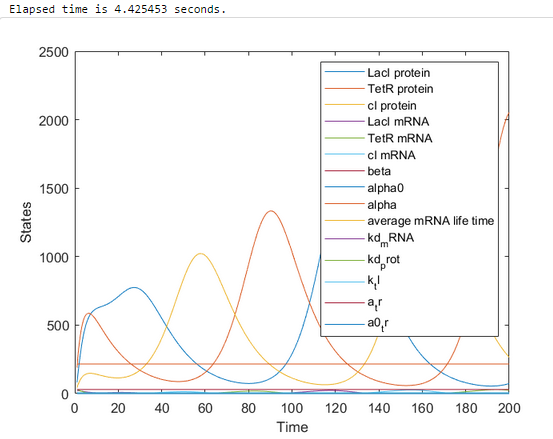

In [5]:
sim_performance["matlab"] = {}
sim_performance["matlab"]["deterministic"] = 4.425

## COPASI simulator

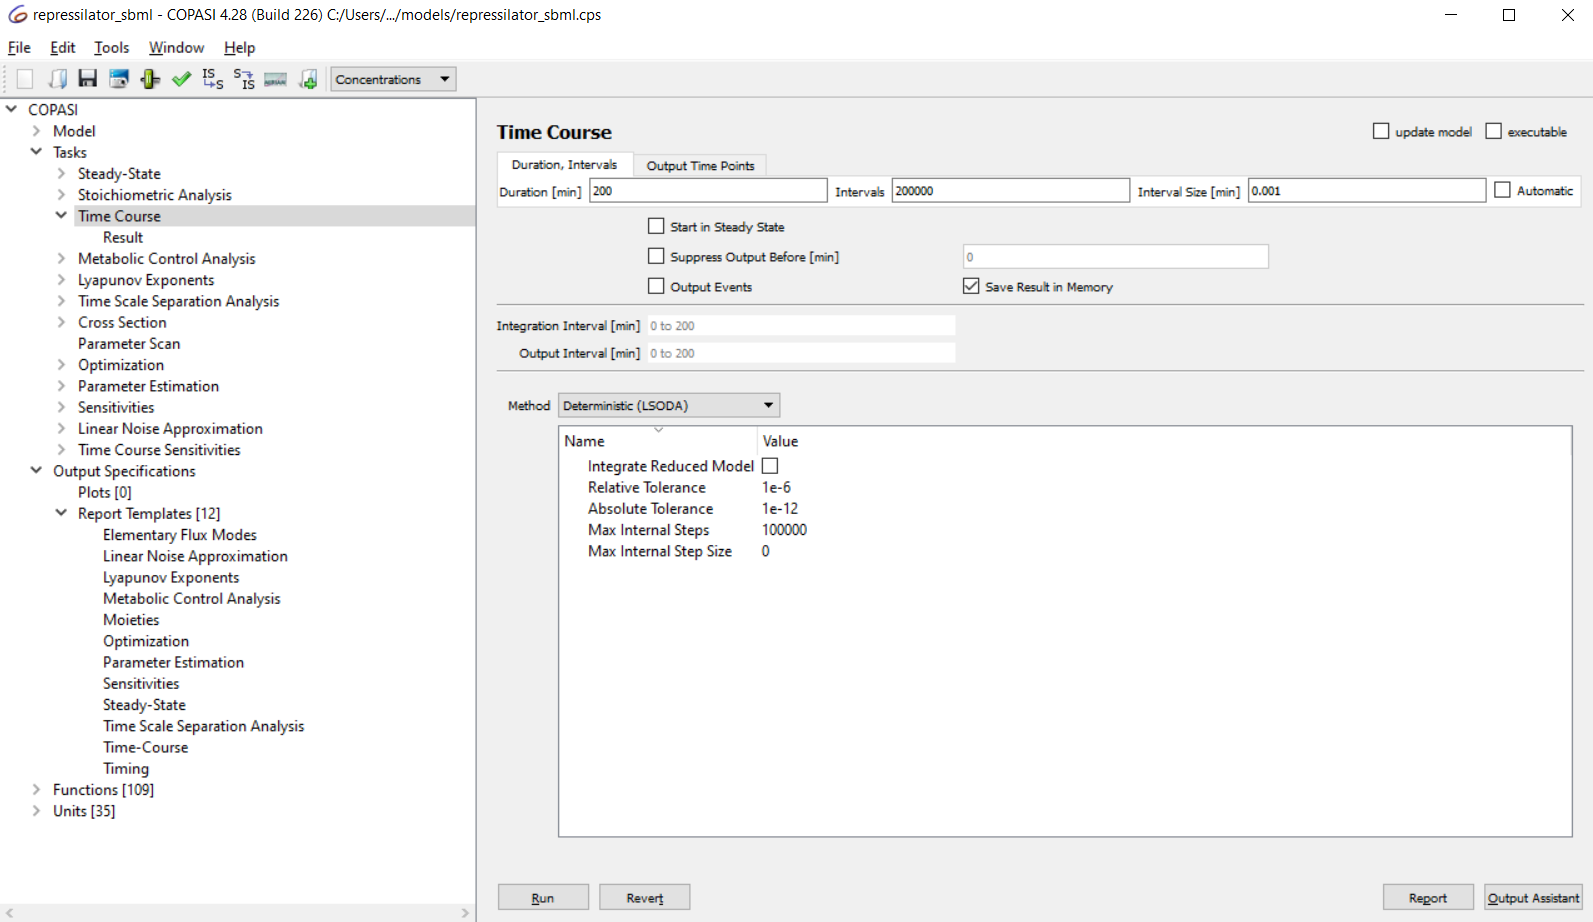

In [6]:
sim_performance["copasi"] = {}
sim_performance["copasi"]["deterministic"] = 0.671

# Stochastic Simulation

## Bioscrape stochastic simulator

C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:56: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


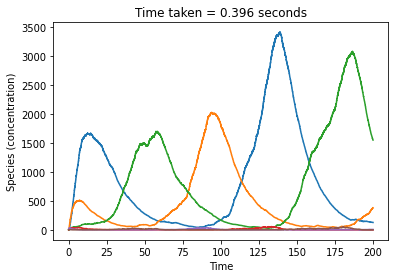

In [7]:
m = Model(sbml_filename="models/repressilator_sbml.xml")
timepoints=np.linspace(0, 200, 200000)
s = ModelCSimInterface(m)
s.py_set_initial_time(timepoints[0])
ssa_simulator = SSASimulator()
t0 = time.time()
stoch_result = ssa_simulator.py_simulate(s,timepoints)
tf = time.time()
results = stoch_result.py_get_dataframe(Model=m)
for species in results:
    if species != 'time':
        plt.plot(timepoints, results[species])
plt.title("Time taken = {:0.3f} seconds".format(tf-t0))
plt.ylabel("Species (concentration)")
plt.xlabel("Time")
plt.show()
sim_performance["bioscrape"]["stochastic"] = tf-t0

## Libroadrunner stochastic simulator

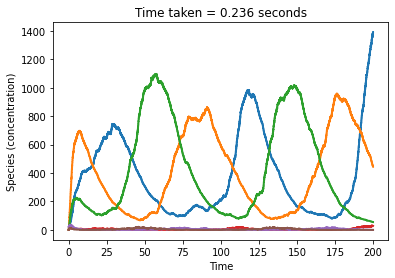

In [8]:
rr = roadrunner.RoadRunner("models/repressilator_sbml.xml")
t0 = time.time()
rr.setIntegrator('gillespie')
results = rr.simulate(0, 200, 200000)
tf = time.time()
plt.title("Time taken = {:0.3f} seconds".format(tf-t0))
plt.ylabel("Species (concentration)")
plt.xlabel("Time")
rr.plot()
sim_performance["roadrunner"]["stochastic"] = tf-t0

## COPASI stochastic simulator

In [9]:
sim_performance["copasi"]["stochastic"] = 0.906

## MATLAB stochastic simulator

> Requires all reactions of the repressilator to be `MassAction` propensity, so stochastic simulation result not available.

In [10]:
sim_performance["matlab"]["stochastic"] = np.nan

In [11]:
sim_performance

{'bioscrape': {'deterministic': 0.16548418998718262,
  'stochastic': 0.3963930606842041},
 'roadrunner': {'deterministic': 0.1338949203491211,
  'stochastic': 0.23618745803833008},
 'matlab': {'deterministic': 4.425, 'stochastic': nan},
 'copasi': {'deterministic': 0.671, 'stochastic': 0.906}}

# Plot all results

C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


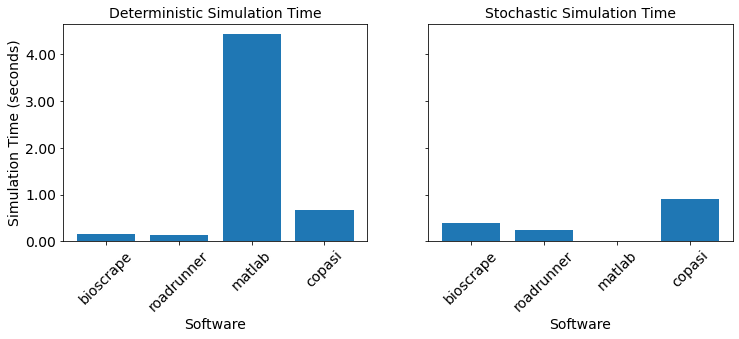

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

software_names = list(sim_performance.keys())
deterministic_sim_times = [sim_performance[name]['deterministic'] for name in software_names]
stochastic_sim_times = [sim_performance[name]['stochastic'] for name in software_names]

ax1.bar(software_names, deterministic_sim_times)
ax1.set_xlabel('Software', fontsize=14)
ax1.set_ylabel('Simulation Time (seconds)', fontsize=14)
ax1.set_title('Deterministic Simulation Time', fontsize=14)
ax1.set_xticklabels(software_names, fontsize=14, rotation=45)
ax1.set_yticklabels(['{:,.2f}'.format(y) for y in ax1.get_yticks()], fontsize=14)

ax2.bar(software_names, stochastic_sim_times)
ax2.set_xlabel('Software', fontsize=14)
ax2.set_title('Stochastic Simulation Time', fontsize=14)
ax2.set_xticklabels(software_names, fontsize=14, rotation=45)
ax2.set_yticklabels(['{:,.2f}'.format(y) for y in ax2.get_yticks()], fontsize=14)
plt.show()
